In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from mtcnn.mtcnn import MTCNN
import cv2
from PIL import Image

Using TensorFlow backend.


In [2]:
img = plt.imread("../000013.jpg")
img.shape

(780, 1040, 3)

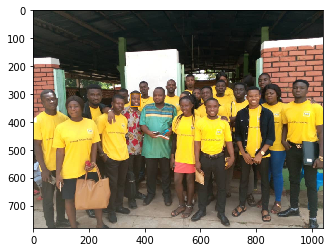

In [3]:
plt.imshow(img)


In [4]:
detector = MTCNN()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [6]:
results = detector.detect_faces(img)
print(results[0])

{'box': [832, 281, 41, 49], 'confidence': 0.9999977350234985, 'keypoints': {'left_eye': (840, 301), 'right_eye': (857, 298), 'nose': (845, 308), 'mouth_left': (841, 319), 'mouth_right': (856, 317)}}


In [9]:
results[0]['confidence']

0.9999977350234985

In [12]:
x1, y1, width, height = results[0]['box']
x2, y2 = x1 + width, y1 + height

In [13]:
face = img[y1:y2, x1:x2]
# for i in range(len(face)):
#     print(face[1])

In [14]:
image = Image.fromarray(face)
image.resize((150,150))
face_array = np.asarray(image)

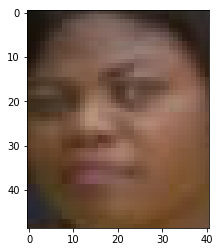

In [15]:
plt.imshow(face_array)

In [17]:
image2 = cv2.imread('../IMG-20190621-WA0008.jpg')
result2 = detector.detect_faces(image2)
print(len(result2))

19


In [36]:
bounding_box = result2[5]['box']
keypoints = result2[9]['keypoints']
print(bounding_box)
print(keypoints)

[549, 240, 27, 33]
{'left_eye': (839, 301), 'right_eye': (857, 299), 'nose': (845, 308), 'mouth_left': (840, 318), 'mouth_right': (855, 317)}


In [37]:
# cv2.rectangle(image2,
#              (bounding_box[0],bounding_box[1]),
#               (bounding_box[0]+bounding_box[2],bounding_box[1]+bounding_box[3]),
#               (0,155,255),
#              2)

cv2.circle(image2, (keypoints['left_eye']),2,(0,155,255))
cv2.circle(image2, (keypoints['right_eye']),2,(0,155,255))
cv2.circle(image2, (keypoints['nose']),2,(0,155,255))
cv2.circle(image2, (keypoints['mouth_left']),2,(0,155,255))
cv2.circle(image2, (keypoints['mouth_right']),2,(0,155,255))
cv2.imwrite('newImage.jpg', image2)

True